In [ ]:
#EDA and Preprocessing
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
print(train.shape)
train.tail()

(647054, 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               647054 non-null  int64  
 1   VisitNumber            647054 non-null  int64  
 2   Weekday                647054 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              647054 non-null  int64  
 5   DepartmentDescription  645693 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


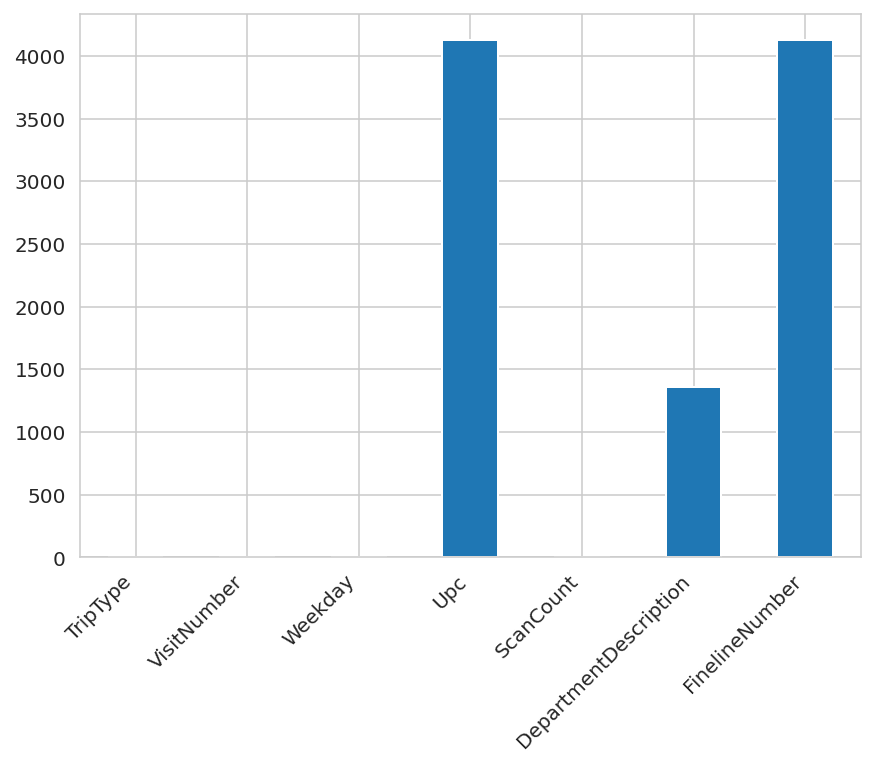

In [ ]:
plt.figure(figsize=(7, 5))
train.isnull().sum().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
wd = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, 
      "Friday": 4, "Saturday": 5, "Sunday": 6}
train["Weekday"] = train["Weekday"].apply(lambda x: wd[x])
test["Weekday"] = test["Weekday"].apply(lambda x: wd[x])

In [ ]:
def float_to_str(obj):
    """
    Convert Upc code from float to string
    Use this function by applying lambda
    :param obj: "Upc" column of DataFrame
    :return: string converted Upc removing dot.
    """
    while obj != "nan":
        obj = str(obj).split(".")[0]
        return obj

train["Upc"] = train.Upc.apply(float_to_str)
test["Upc"] = test.Upc.apply(float_to_str)


[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Trip Type'),
 Text(0.5, 1.0, 'The Frequent of Trip Type')]

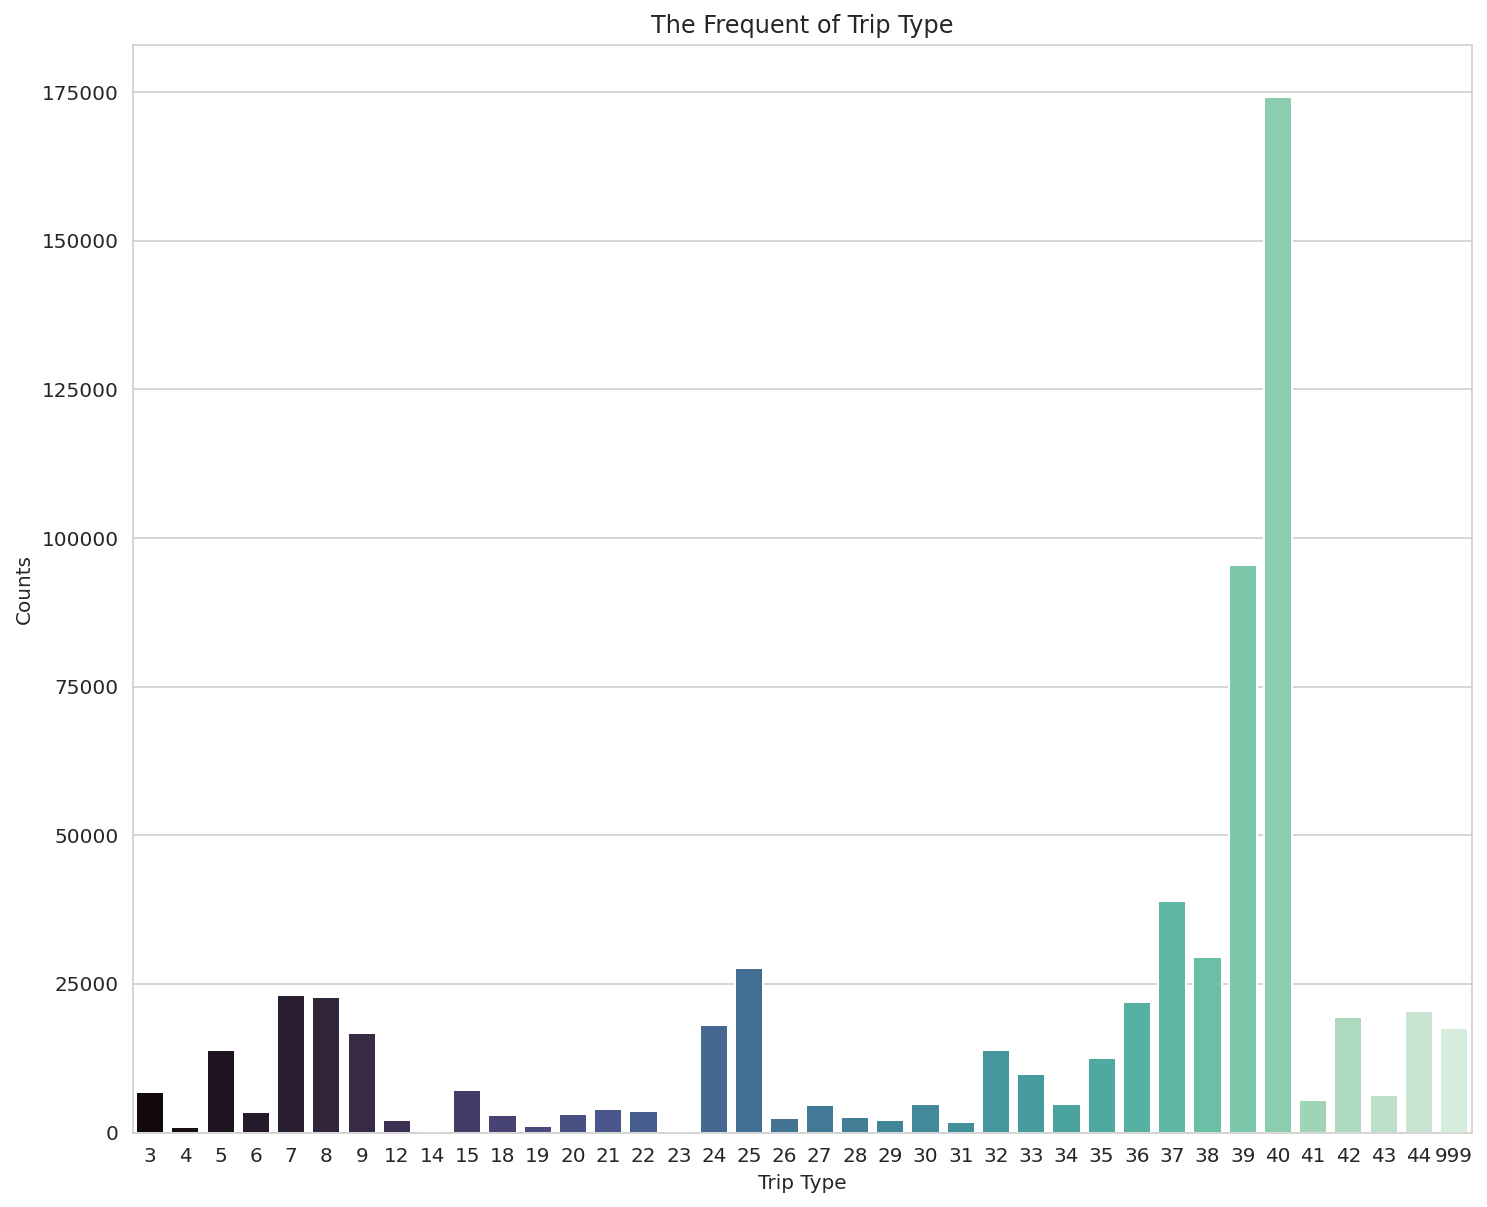

In [ ]:
train['TripType'].value_counts()
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax = sns.countplot(x = 'TripType', data = train, palette = 'mako')
ax.set(title = 'The Frequent of Trip Type', ylabel = 'Counts', xlabel = 'Trip Type')

In [ ]:
train_dd = pd.get_dummies(train["DepartmentDescription"])
test_dd = pd.get_dummies(test["DepartmentDescription"])

train_dd = pd.concat([train[["VisitNumber"]], train_dd], axis=1)
test_dd = pd.concat([test[["VisitNumber"]], test_dd], axis=1)

train_dd = train_dd.groupby("VisitNumber", as_index=False).sum()
test_dd = test_dd.groupby("VisitNumber", as_index=False).sum()
train_dd.tail()

,VisitNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
95669,191343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95670,191344,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
95671,191345,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,3,1,0,0,0,0,0,2,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95672,191346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
95673,191347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = train.merge(train_dd, on=["VisitNumber"])

In [ ]:
#remove null and infinite values
train.replace(np.inf, 0, inplace=True)
train.fillna(value=0, inplace=True)

test.replace(np.inf, 0, inplace=True)
test.fillna(value=0, inplace=True)
train.drop("DepartmentDescription", axis=1, inplace=True)
test.drop("DepartmentDescription", axis=1, inplace=True)
train.drop("VisitNumber", axis=1, inplace=True)
test.drop("VisitNumber", axis=1, inplace=True)

In [ ]:
train.loc[train["ScanCount"] < 0, "Return"] = 1
train.loc[train["Return"] != 1, "Return"] = 0

test.loc[test["ScanCount"] < 0, "Return"] = 1
test.loc[test["Return"] != 1, "Return"] = 0

train["Pos_Sum"] = train["ScanCount"]
test["Pos_Sum"] = test["ScanCount"]

train.loc[train["Pos_Sum"] < 0, "Pos_Sum"] = 0
test.loc[test["Pos_Sum"] < 0, "Pos_Sum"] = 0

train["Neg_Sum"] = train["ScanCount"]
test["Neg_Sum"] = test["ScanCount"]

train.loc[train["Neg_Sum"] > 0, "Neg_Sum"] = 0
test.loc[test["Neg_Sum"] > 0, "Neg_Sum"] = 0

In [ ]:
train.drop("ScanCount", axis=1, inplace=True)
test.drop("ScanCount", axis=1, inplace=True)
# upc is unique for each customer i.e no need to put it in model training
train.drop("Upc", axis=1, inplace=True)
test.drop("Upc", axis=1, inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Weekday']])
var = scaler.transform(train[['Weekday']])
# train.drop("FinelineNumber", axis=1, inplace=True)
# test.drop("FinelineNumber", axis=1, inplace=True)
train['Weekday'] = var
scaler1 = MinMaxScaler()
scaler1.fit(train[['FinelineNumber']])
var1 = scaler1.transform(train[['FinelineNumber']])
train['FinelineNumber'] = var1

In [ ]:
train.head()
print(train.shape)
train

(647054, 74)


,TripType,Weekday,FinelineNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Return,Pos_Sum,Neg_Sum
0,999,0.666667,0.100020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,-1
1,30,0.666667,0.893279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,1,0
2,30,0.666667,0.450490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,1,0
3,26,0.666667,0.356571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2,0
4,26,0.666667,0.101720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647049,39,1.000000,0.111822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0.0,1,0
647050,39,1.000000,0.175235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0.0,1,0
647051,39,1.000000,0.417083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0.0,1,0
647052,8,1.000000,0.151230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

classifier = Sequential()
classifier.add(tf.keras.layers.Dense( 73 , activation = tf.nn.relu))
classifier.add(tf.keras.layers.Dense( 5 , activation = tf.nn.relu))
classifier.add(tf.keras.layers.Dense( 5 , activation = tf.nn.relu))
classifier.add(tf.keras.layers.Dense(38 , activation = tf.nn.softmax))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
metrics = ['accuracy'])
from sklearn.model_selection import train_test_split


y =  train['TripType']
# y = np.asarray(y).astype(np.float32)

label_enc = LabelEncoder().fit(y)
y_label = label_enc.transform(y)
y_cat = to_categorical(y_label)

x = train.drop('TripType',1)
# x = np.asarray(x).astype(np.float32)

In [ ]:
y_label


array([37, 22, 22, ..., 31,  5,  5])

In [ ]:
y_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
        x, y_cat, test_size=0.33, random_state=0) 
classifier.fit(x_train, y_train, epochs = 50)

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

13548/13548 [==============================] - 19s 1ms/step - loss: 1.3807 - accuracy: 0.6051
Epoch 2/50
13548/13548 [==============================] - 19s 1ms/step - loss: 1.1858 - accuracy: 0.6573
Epoch 3/50
13548/13548 [==============================] - 19s 1ms/step - loss: 1.1403 - accuracy: 0.6680
Epoch 4/50
13548/13548 [==============================] - 19s 1ms/step - loss: 1.1152 - accuracy: 0.6738
Epoch 5/50
13548/13548 [==============================] - 19s 1ms/step - loss: 1.0989 - 

In [ ]:
history = classifier.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=20)

Epoch 1/20
13548/13548 [==============================] - 27s 2ms/step - loss: 0.0405 - accuracy: 0.7059 - val_loss: 0.0409 - val_accuracy: 0.7048
Epoch 2/20
13548/13548 [==============================] - 26s 2ms/step - loss: 0.0405 - accuracy: 0.7055 - val_loss: 0.0411 - val_accuracy: 0.7003
Epoch 3/20
13548/13548 [==============================] - 27s 2ms/step - loss: 0.0405 - accuracy: 0.7053 - val_loss: 0.0412 - val_accuracy: 0.7015
Epoch 4/20
13548/13548 [==============================] - 27s 2ms/step - loss: 0.0405 - accuracy: 0.7060 - val_loss: 0.0410 - val_accuracy: 0.6999
Epoch 5/20
13548/13548 [==============================] - 26s 2ms/step - loss: 0.0405 - accuracy: 0.7056 - val_loss: 0.0409 - val_accuracy: 0.7035
Epoch 6/20
13548/13548 [==============================] - 26s 2ms/step - loss: 0.0404 - accuracy: 0.7062 - val_loss: 0.0409 - val_accuracy: 0.7043
Epoch 7/20
13548/13548 [==============================] - 26s 2ms/step - loss: 0.0404 - accuracy: 0.7058 - val_loss: 0

In [ ]:
from sklearn.metrics import accuracy_score
y_pred= classifier.predict(x_test)

In [ ]:
ans1 = []
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(137094):
  sub_val = np.argmax(y_test[i])
  ans1.append(sub_val)
print(ans1)
le.fit(ans1)
ans2 = []
for i in range(137094):
  sub_val = np.argmax(y_pred[i])
  ans2.append(sub_val)
final_ans = le.inverse_transform(ans2)
df = pd.DataFrame(final_ans)
df.to_csv('Abhishek_101703016.csv', index = False)

[24, 31, 30, 30, 25, 32, 17, 29, 32, 31, 32, 17, 32, 28, 18, 6, 16, 28, 30, 17, 28, 6, 34, 32, 14, 2, 32, 31, 2, 4, 25, 37, 31, 32, 32, 0, 30, 12, 32, 17, 35, 35, 32, 32, 32, 26, 27, 29, 6, 36, 31, 32, 23, 31, 32, 30, 28, 37, 30, 31, 16, 31, 32, 36, 32, 36, 34, 32, 30, 5, 37, 14, 32, 31, 16, 30, 32, 10, 6, 17, 29, 17, 32, 31, 31, 9, 2, 31, 6, 37, 27, 16, 17, 31, 29, 32, 2, 32, 19, 37, 6, 16, 37, 32, 32, 30, 32, 32, 31, 4, 31, 30, 32, 32, 30, 35, 29, 34, 32, 5, 34, 32, 37, 37, 26, 37, 33, 34, 4, 0, 32, 32, 36, 32, 17, 24, 31, 32, 25, 32, 32, 29, 32, 16, 32, 11, 27, 32, 5, 32, 37, 36, 32, 4, 34, 20, 31, 34, 32, 32, 32, 26, 5, 17, 6, 6, 30, 32, 31, 19, 13, 32, 32, 10, 30, 17, 3, 32, 34, 32, 27, 32, 32, 32, 2, 32, 31, 29, 31, 32, 32, 30, 32, 4, 4, 32, 29, 32, 19, 31, 32, 17, 7, 16, 32, 4, 29, 5, 32, 32, 32, 32, 9, 31, 32, 17, 31, 32, 5, 31, 31, 5, 14, 29, 6, 32, 32, 26, 18, 4, 32, 32, 29, 17, 31, 31, 29, 31, 28, 32, 32, 32, 35, 4, 31, 9, 32, 32, 29, 16, 32, 26, 32, 30, 16, 32, 9, 2, 29, 16

In [ ]:
l = classifier.predict(x_test)
col = []
for i in sorted(np.unique(train.TripType)):
  col.append('TripType_'+str(i))
def change(s):
  return np.round(s,0)
sub = pd.DataFrame(data = l, columns=col)
for i in col:
  sub[i] = sub[i].apply(change)

sub['VisitNumber'] = test['VisitNumber']
sub.to_csv('final.csv', index = False, header = True)
sub.drop_duplicates(keep="first",inplace=True)
sub.to_csv('Abhishek_101703026.csv', index = False, header = True)